In [1]:
import skimage
import skimage.io
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import laplace
%matplotlib inline

In [2]:
GOES = skimage.io.imread('GOES14.tif')

In [3]:
type(GOES)

numpy.ndarray

In [5]:
GOES.max(), GOES.min()

(255, 41)

In [6]:
GOES.shape

(556, 541, 2)

In [7]:
GOES.dtype

dtype('uint8')

In [8]:
GOES0 = np.squeeze(GOES[:,:,0])

In [9]:
GOES0.shape

(556, 541)

In [10]:
GOES1 = np.squeeze(GOES[:,:,1])

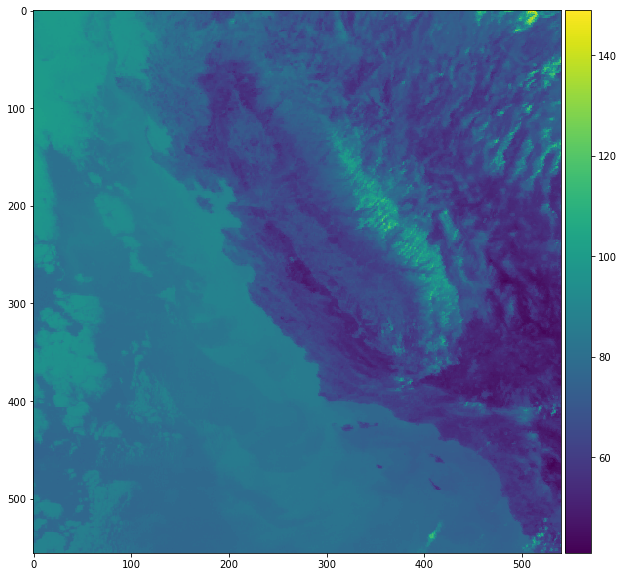

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(GOES0,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

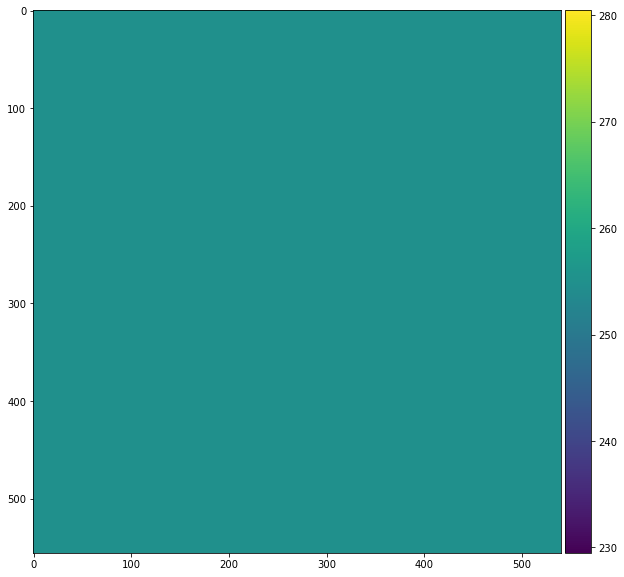

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(GOES1,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [13]:
np.array(GOES0)

array([[ 99,  99, 100, ...,  95,  95,  86],
       [ 99,  99,  99, ...,  87,  78,  78],
       [ 97,  98,  98, ...,  87,  78,  78],
       ...,
       [ 89,  89,  89, ...,  63,  59,  59],
       [ 89,  89,  89, ...,  61,  61,  61],
       [ 89,  89,  89, ...,  60,  60,  61]], dtype=uint8)

In [14]:
np.array(GOES1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
height, width, = GOES0.shape
print("height: ", height, "width: ", width, "type: ", type(GOES0))

height:  556 width:  541 type:  <class 'numpy.ndarray'>


In [16]:
smallGOES0 = resize(GOES0, (round(height/2), round(width/2)))*255

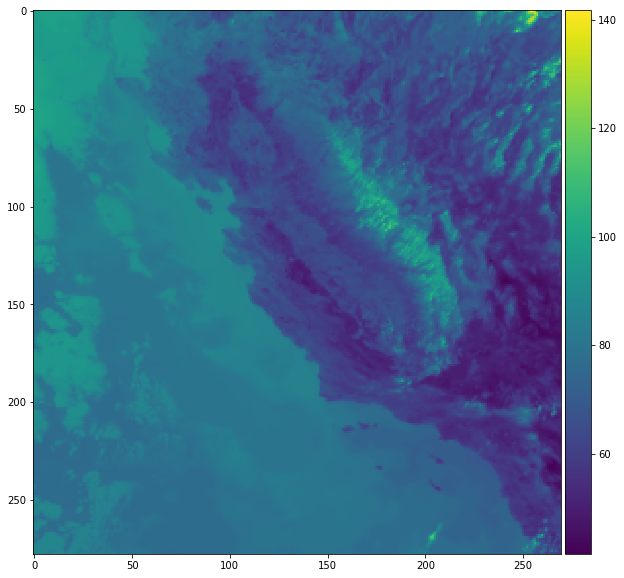

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(smallGOES0,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [21]:
smallGOES0.shape

(278, 270)

In [22]:
blurryGOES0 = resize(smallGOES0, (height, width))

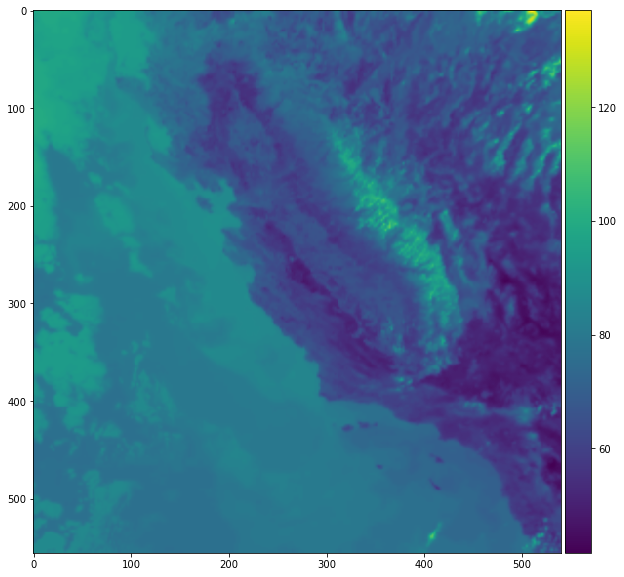

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(blurryGOES0,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [24]:
details = GOES0 - blurryGOES0


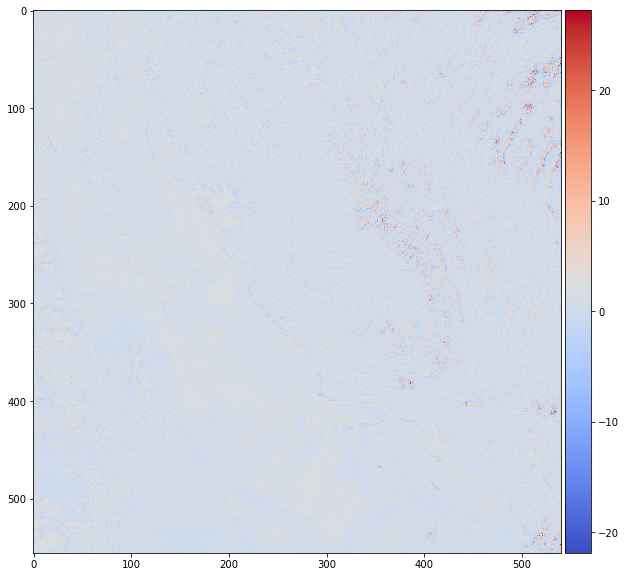

In [25]:

fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(details,cmap=plt.get_cmap('coolwarm'),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)


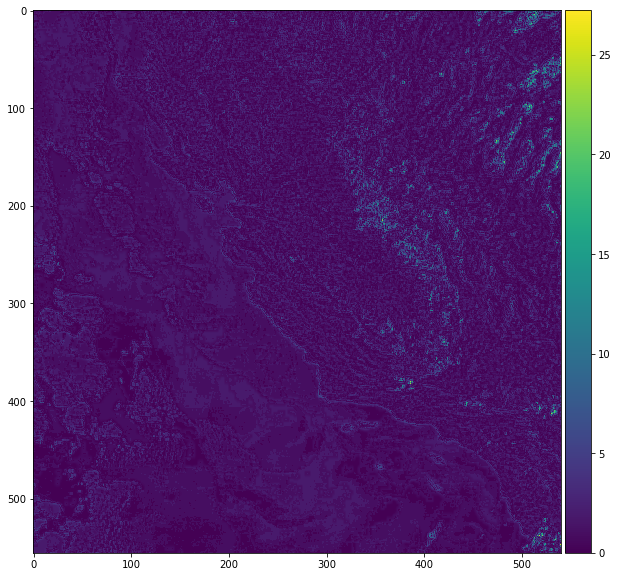

In [26]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs(details),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [192]:
laplace_edges = laplace(blurryGOES0)*.9001
##.75,.5,.999,1.1,1.5,1.25,1,.9,.91,.9009,.901,.9002,1.9002,.1,.509,.592,.5092,.595,.599,.598,.6,.61,.80,.79

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(laplace_edges,cmap=plt.get_cmap('coolwarm'),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs(laplace_edges),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [ ]:
fig, ax = plt.subplots(1,1)
im=ax.scatter(details,laplace_edges, alpha=0.01,s=0.5)

In [193]:
sharped_image = blurryGOES0+laplace_edges

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(sharped_image,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [194]:
abs_error = abs(GOES0-sharped_image)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs(abs_error),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [4]:
abs_error.max(), abs_error.mean(), abs_error.std()

NameError: name 'abs_error' is not defined

In [421]:
abs(details- laplace_edges).max(), abs(details- laplace_edges).mean()

(25.30608435809911, 1.2393984848344284)

In [368]:
np.sqrt(((details- laplace_edges)**2).mean())

1.627284306595595

In [369]:
##1.2297618590765287, 0.9763992405574293 - GOES7 mean,std

In [322]:
##1.247761310388818, 1.044579306127153